<a href="https://colab.research.google.com/github/eunineelizze/ElizzeAP155/blob/master/Arzaga_AP155_Lab_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AP155 Lab Assignment**
## Module 3: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: **Arzaga, Eunine Elizze**\
_Student No._: **2021-10771**\
_Section_: **TX-1**

### Submission Information

_Date and Time Submitted (most recent upload)_: 20 Oct 2024 (14:45)

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Eunine Elizze J. Arzaga

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[100]**/100

Score breakdown:
* Problem 1 - [30]/30
* Problem 2 - [70]/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

# PROBLEM 1
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(15 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(15 pts.)*


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import zeros, arange, sin, abs
from cmath import exp, pi

# Modulated sine wave
N = 1000 # total number of samples
n = arange(N) # to return evenly spaced points
y_n = sin(pi * n / N) * sin(20 * pi * n / N) # given value

# Function to compute the DFT
def DFT(y):
    N = len(y)
    c = zeros(N//2+1, complex)
    for k in range(N//2+1): # proportional to the frequency of the waves
        for n in range(N):
            c[k] += y[n] * exp(-2j * pi * k * n / N) # Fourier coeffs (DFT of y_n)
    return c

c_k = DFT(y_n) # computing coeffs using the DFT function
amplitude = abs(c_k) # amplitude of fourier coefficients

print(c_k[:10])

[ 4.07211428e-14  +0.j         -1.95000266e-14  +0.32645282j
  5.17427355e-15  +0.69469161j  3.90909093e-16  +1.16078813j
  2.17347570e-14  +1.81941714j  1.08654405e-14  +2.86118021j
  3.13431193e-14  +4.74138439j -2.59828780e-14  +8.81897506j
 -2.02856124e-14 +20.97485977j  2.67020293e-14+105.88270624j]


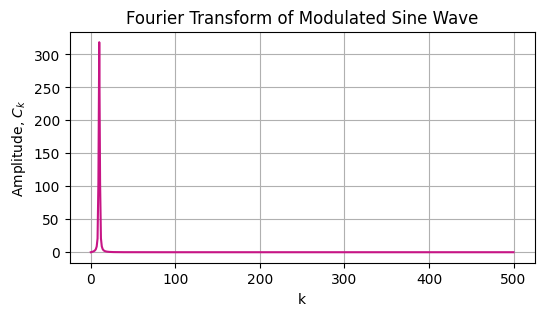

In [ ]:
# Plotting the fourier transform

plt.figure(figsize=(6, 3))
plt.xlabel('k')
plt.ylabel('Amplitude, $C_k$')
plt.grid(True)
plt.plot(amplitude, color='mediumvioletred')
plt.title('Fourier Transform of Modulated Sine Wave')
plt.show()


In [ ]:
print(max(amplitude)) # to see where the wave function is modulated

318.5089544870544


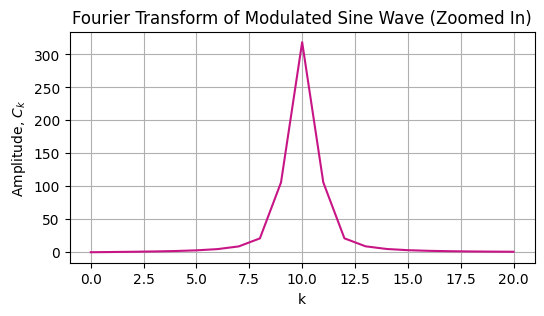

In [ ]:
# Zooming in to the 0-21 amplitude

plt.figure(figsize=(6, 3))
plt.plot(range(0, 21), amplitude[0:21], color='mediumvioletred')
plt.title('Fourier Transform of Modulated Sine Wave (Zoomed In)')
plt.xlabel('k')
plt.ylabel('Amplitude, $C_k$')
plt.grid(True)
plt.show()

**Analysis:**

The single peak at $k=10$ is a result of the modulation of the two sine waves multiplied with each other. Moreover, since $sin(\frac{20\pi}{N})$ has higher frequency than $sin(\frac{\pi}{N})$, the DFT picks up the signal from this factor.

Using Discrete Fourier Transform, we shift the time-domain function, $y_n$, to the frequency domain, $c_k$. The frequencies of the sine waves are $1/2N$ and $10/N$, which produces a modulation envelope. The DFT picks this up as a single peak corresponding to the dominant modulation frequency.

**Notes:**

- Increasing the frequency will change the peak, moving it to a higher k-value.
- Increasing the sample points will also increase the resolution of the transform, narrowing the band.
- Changing the modulation function will also change the transform, potentially adding sidebands.

# PROBLEM 2

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the Course Pack > Datasets folder).

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(10 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(20 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(10 pts.)*

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(30 pts.)*

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
dow = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/Data/Copy of dow.txt")

print(dow[:10])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[12121.71 12136.44 12226.73 12221.93 12194.13 12283.85 12331.6  12309.25
 12278.41 12307.48]


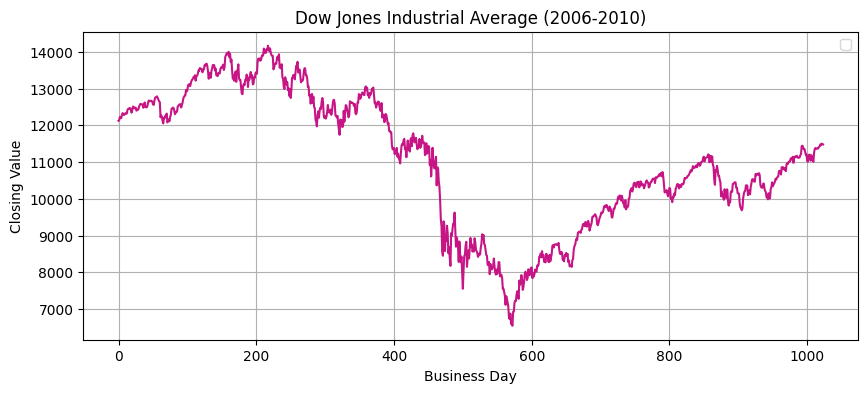

In [ ]:
import matplotlib.pyplot as plt

# Plotting the original Dow Jones data
plt.figure(figsize=(10, 4))
plt.plot(dow, color='mediumvioletred')
plt.title('Dow Jones Industrial Average (2006-2010)')
plt.xlabel('Business Day')
plt.ylabel('Closing Value')
plt.grid(True)
plt.show()

The plot shows the Dow Jones Industrial Average (DJIA) which is a stock market index that shows the closing value or  final price (y-axis) of a stock at the end of a trading day (x-axis). It represents the last price at which a transaction occurred before the stock market closes.

Using Fourier Transform and Inverse Fourier Transform, we want to decompose these fluctuations to observe which components contribute significantly to the variation in stock market data.

[ 1.12839039e+07     +0.j          6.84127740e+05-955087.51914779j
 -4.19226205e+05 +92908.95615825j  7.41901498e+04-273812.25003958j
 -3.51856811e+04 +72365.86128838j  1.11482643e+05 -31477.9806891j
  2.16752824e+04 -24575.15492195j  1.11224416e+04 +24797.57044774j
  3.11884665e+04 +22786.82096782j  7.38523102e+03 -32123.34266319j]


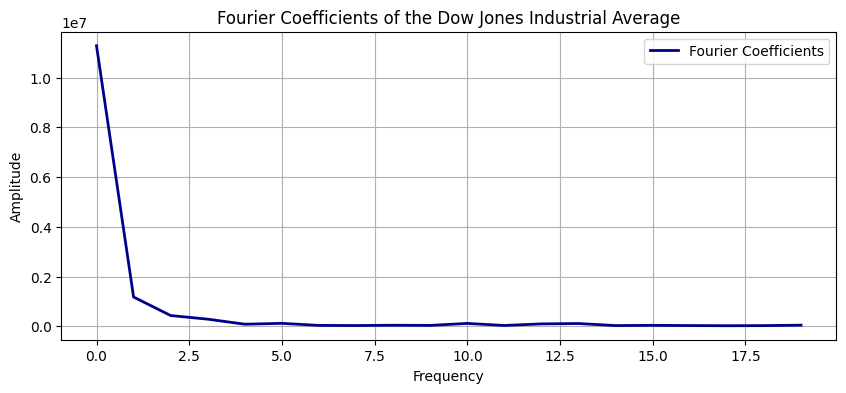

In [ ]:
# Finding the real-valued Fourier transform
from numpy.fft import rfft, irfft

dow_fft = rfft(dow) # shows the contribution of each frequency component to the original dow data
print(dow_fft[:10])

# Plotting the absolute value of the Fourier coefficients
plt.figure(figsize=(10, 4))
plt.plot(np.abs(dow_fft)[0:20], label='Fourier Coefficients', color='darkblue', linewidth=2)
# we limit only to the range of 0 to 20 to see the peak
plt.title('Fourier Coefficients of the Dow Jones Industrial Average')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Keeping the first 10% of the coefficients, setting the rest to zero
N = len(dow_fft)
ten_percent = int(0.1 * N) # converts values to integers

dow_fft_filtered = np.zeros_like(dow_fft) # creates an array of zeros
dow_fft_filtered[:ten_percent] = dow_fft[:ten_percent] # copies 10% values to the array of zeros

Setting most (90%) of the coefficients to zero will effectively remove high-frequency components which are likely rapid fluctuations or short-term variation in the stock market.

Next, we take the Inverse Fourier Transform to plot the filtered data. We expect a smoother curve.

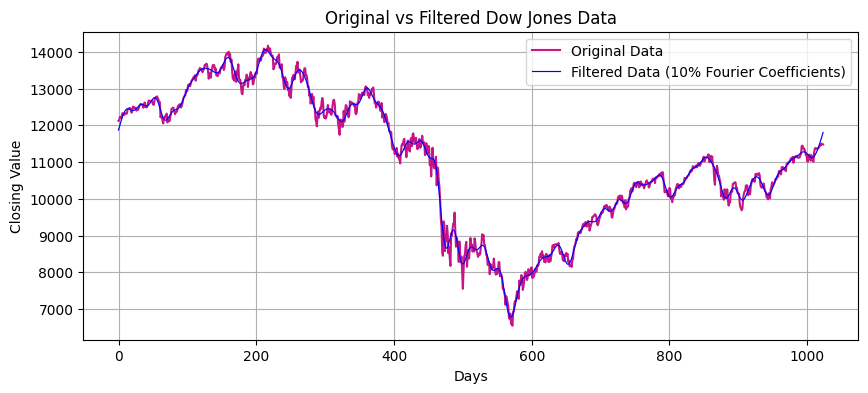

In [ ]:
dow_filtered = irfft(dow_fft_filtered)

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(dow, label='Original Data', color='mediumvioletred')
plt.plot(dow_filtered, label='Filtered Data (10% Fourier Coefficients)', color='blue', linewidth=0.85)
plt.title('Original vs Filtered Dow Jones Data')
plt.xlabel('Days')
plt.ylabel('Closing Value')
plt.grid(True)
plt.legend()
plt.show()


**Analysis:**

- The filtered data retains the general shape of the original data but is much smoother, removing most of the short-term noise while preserving the larger fluctuations or overall trend.
- Retaining only 10% of the dominant signals will filter the long-term stock market behavior over time.
- This process is similar to high pass and low pass filters where we filter out the noise to only let a certain frequency pass.

What if we make the threshold even smaller, i.e., we retain only 1% of the Fourier Coefficients instead of 10%?

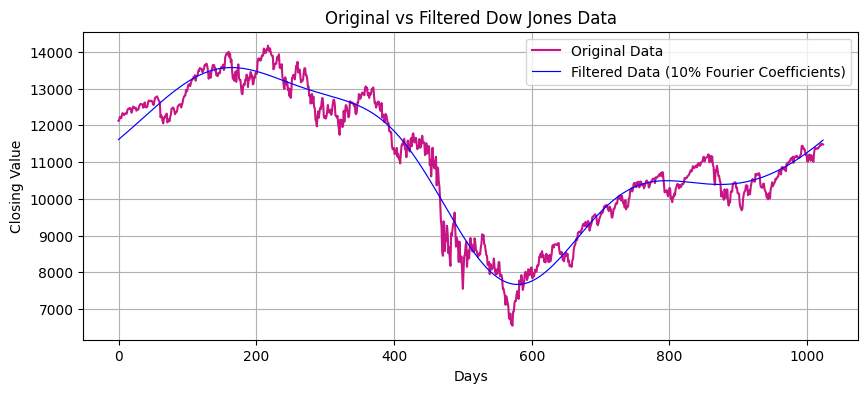

In [ ]:
one_percent = int(0.01 * N)
dow_fft_filtered_1 = np.zeros_like(dow_fft) # array of zeros
dow_fft_filtered_1[:one_percent] = dow_fft[:one_percent] # retaining 1% of coeffs
dow_filtered = np.fft.irfft(dow_fft_filtered_1) # inverse fourier transform

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(dow, label='Original Data', color='mediumvioletred')
plt.plot(dow_filtered, label='Filtered Data (10% Fourier Coefficients)', color='blue', linewidth=0.85)
plt.title('Original vs Filtered Dow Jones Data')
plt.xlabel('Days')
plt.ylabel('Closing Value')
plt.grid(True)
plt.legend()
plt.show()

The overall trend of stock market prices over the span of 4 years from 2016 to 2010 shows huge dip somewhre between 400-800 days. This corresponds to the years 2007 to 2009 when the Great Recession, a global market decline, occured.

Removing 99% of the Fourier coefficients eliminate almost all of the stock variations, leading to a much smoother curve. This highlights the slowest-varying trends and mimics a low pass filter that removes high-frequency noise, leaving only the large-scale data trends behind.

Keeping only 1% of the Fourier Coefficients is useful for **annual** analysis of the stock market. However, we cannot see monthly or weekly variations from this.

*Increasing the zeroed out values allows us to analyze longer time scales. It is better to adjust the filtering of the coefficients depending on the time scale we want to study.*